In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Basic Information
df = pd.read_csv('healthcare-dataset-stroke-data.csv.xls')

In [24]:
#Handling missing values and skewness 
df['bmi_log'] = np.log1p(df['bmi'].fillna(df['bmi'].median()))
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])

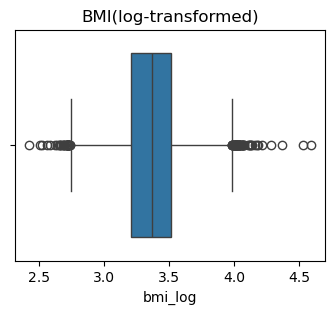

In [38]:
plt.figure(figsize = (4,3))
sns.boxplot(x='bmi_log', data = df)
plt.title("BMI(log-transformed)")
plt.show()

In [30]:
#Encode categorical variables 
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
df_encoded = pd.get_dummies(df.drop('id', axis = 1), drop_first = True)

In [32]:
#Train and evaluate Random Forest
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [34]:
def train_evaluate_rf(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    return model

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



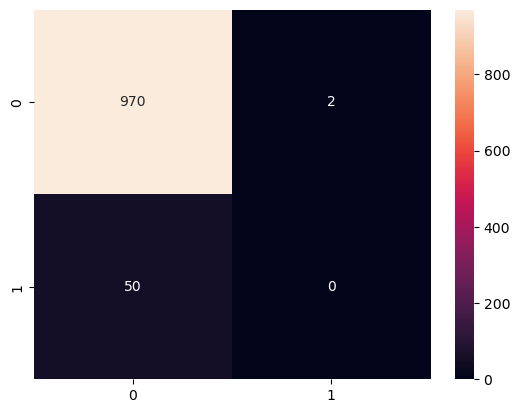

In [36]:
rf_model = train_evaluate_rf(X_train, y_train, X_test, y_test)